# 1. Свойства LTI систем
LTI система полностью описывается импульсной характеристикой $h[n]$


$y[n] = S\Big(x[n]\Big) = \sum\limits_{k=-\infty}^\infty x[k]\cdot h[n-k] = x[n]*h[n]$

## Свойства свертки:

1. Коммутативность $a[n]*b[n]=b[n]*a[n]$. 
2. Дистрибутивность $x[n]*\Big(h_1[n] + h_2[n]\Big)$
3. Ассоциативность $\Big(x[n]*h_1[n]\Big)*h_2[n] = x[n]*\Big(h_1[n]*h_2[n]\Big)$


## Комбинация LTI систем
Как следствие последовательность применения LTI систем не важна:

$y_1[n] = S_{1}\Big(x[n]\Big) = x[n]*h_1[n]$

$y_2[n] = S_{2}\Big(y_1[n]\Big) = y_1[n]*h_2[n]$

$y_2[n] = \Big(x[n]*h_1[n]\Big)*h_2[n] = x[n]*\Big(h_1[n]*h_2[n]\Big) = x[n]*\Big(h_2[n]*h_1[n]\Big) = \Big(x[n]*h_2[n]\Big)*h_1[n]$

### Вопрос

Как связана испульсная характеристика $h_{12}[n]$ системы $y_2[n] = S_{12}\Big(x[n]\Big)$ с испульсными характеристиками $h_1[n]$ и $h_2[n]$?

.

.

.

*Ответ:* $h_{12}[n] = h_{1}[n]*h_{2}[n]$




### Пример

1. Идеальная система задержки на 2 отсчета: $$h_1[n] = \delta[n-2]$$

2. Скользящее среднее с симметричным окном в 3 отсчета: $$h_2[n] = \frac{1}{3}\Big(\delta[n-1] + \delta[n] + \delta[n+1]\Big) $$

Комбинация систем 1 и 2:

$h_{12} = h_{2}[n]*h_{1}[n] = \frac{1}{3}\Big(\delta[n-1] + \delta[n] + \delta[n+1]\Big) * \delta[n-2]$

$h_{12} = \sum\limits_{k=-\infty}^\infty \frac{1}{3}\Big(\delta[k-1] + \delta[k] + \delta[k+1]\Big)\cdot \delta[n-2-k]$

$h_{12} = \frac{1}{3}\Big(\delta[n-3] + \delta[n-2] + \delta[n-1]\Big)$

In [2]:
import pylab as plt
import numpy as np
plt.rcParams['axes.grid'] = True

n = np.arange(-10, 11)

x = np.zeros(len(n))
x[np.in1d(n, [0, 1, 2, 3])] = [4, 2, 6, 2]

h1 = (n-2==0)
h2 = (n-1==0).astype(int)/3 + (n==0).astype(int)/3 + (n+1==0).astype(int)/3


fig, ax = plt.subplots(4, sharex=True, sharey=True, figsize=(4,5), dpi=150)

ax[0].stem(n, x)
ax[0].set_title('$x[n]$')

ax[1].stem(n, np.convolve(x, h1,'same'))
ax[1].set_title('$x[n]*h_1[n]$')

ax[2].stem(n, np.convolve(x, h2,'same'))
ax[2].set_title('$x[n]*h_2[n]$')

ax[3].stem(n, np.convolve(np.convolve(x, h1,'same'), h2, 'same'))
ax[3].set_title('$x[n]*h_{12}[n]$')

plt.ylim(-1, 7)
plt.tight_layout()

# 2. Проверка устойчивости (stable)

Напоминание: система устойчива если для любой ограниченной входной последовательности

$|x[n]| \le B_x <\infty$ $\forall n $

Выходная последовательность ограничена

$|y[n]| \le B_y <\infty$ $\forall n $

### Для LTI системы:
$|y[n]| = \Big|x[n]*h[n] \Big| = \Big|\sum\limits_{k=-\infty}^\infty x[k]\cdot h[n-k] \Big| \le 
\sum\limits_{k=-\infty}^\infty |x[k]|\cdot |h[n-k]| = B_x\sum\limits_{k=-\infty}^\infty |h[n-k]|  $

$\sum\limits_{k=-\infty}^\infty |h[n-k]| < \infty$

### Примеры:

*Скользящее среднее - устойчива*

$h[n] = \frac{1}{3}\Big(\delta[n-1] + \delta[n] + \delta[n+1]\Big) $

$\sum\limits_{k=-\infty}^\infty |h[n-k]| = \sum\limits_{k=-\infty}^\infty \Big| \frac{1}{3}\Big(\delta[k-1] + \delta[k] + \delta[k+1]\Big) \Big| = 1$

*Сумматор - НЕустойчив*

$y[n] = \sum\limits_{k=-\infty}^{n}x[k]$


$h[n] = S\big(\delta[n]\big) = \sum\limits_{k=-\infty}^{n}\delta[k] = u[n]$

$h[n] = u[n]$

$\sum\limits_{k=-\infty}^\infty |u[n-k]| = \infty $

### Вопрос:
Рассмотрим LTI систему с испульсной характеристикой:

$h[n] = a^n\cdot u[n]$

При каких $a$ данная система устойчива? 

.

.

.

$\sum\limits_{k=-\infty}^\infty |a^n|\cdot |u[n-k]| = \sum\limits_{k=0}^\infty |a|^n$

При $|a|<1$:

$\sum\limits_{k=-\infty}^\infty |a|^n = \frac{1}{1-|a|} < \infty$

# 3. Представление LTI системы в виде разностной схемы

Некоторые LTI системы могут быть заданы следующим уравнением:

$\sum\limits_{k=0}^K a_k\cdot y[n-k] = \sum\limits_{m=0}^M b_m\cdot x[n-m]$

## Примеры

### Скользящее среднее по 3 последним отсчетам

$y[n] = \frac{1}{3}\Big(x[n] + x[n-1] + x[n-2]\Big)$


$a_0 = 1$

$b_0=b_1=b_2 = \frac{1}{3}$



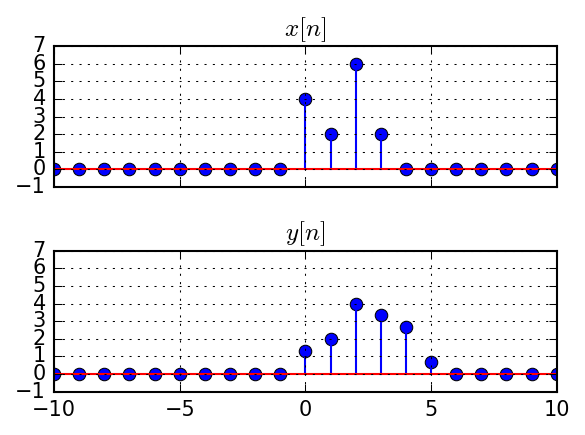

In [3]:
from scipy import signal
y = signal.lfilter(b=[1/3, 1/3, 1/3], a=[1], x=x)

fig, ax = plt.subplots(2, sharex=True, sharey=True, figsize=(4,3), dpi=150)

ax[0].stem(n, x)
ax[0].set_title('$x[n]$')

ax[1].stem(n, y)
ax[1].set_title('$y[n]$')


plt.ylim(-1, 7)
plt.tight_layout()

### Экспоненциальный сглаживатель
$y[n] = \beta \cdot y[n-1] + (1-\beta) \cdot x[n]$ 

$\beta \in [0,1] $ - коэффициент сглаживания


В виде разностной схемы:

$y[n] - \beta \cdot y[n-1] = (1-\beta) \cdot x[n] $ 

$a_0 = 1$

$a_1 = -\beta$

$b_0=1-\beta$

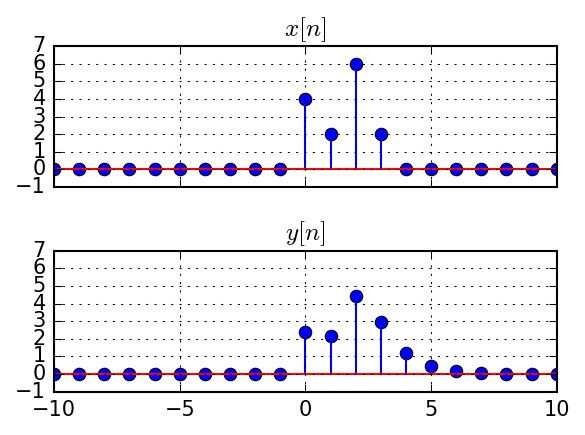

In [4]:
beta=0.4
y = signal.lfilter(b=[1-beta], a=[1, -beta], x=x)

fig, ax = plt.subplots(2, sharex=True, sharey=True, figsize=(4,3), dpi=150)

ax[0].stem(n, x)
ax[0].set_title('$x[n]$')

ax[1].stem(n, y)
ax[1].set_title('$y[n]$')


plt.ylim(-1, 7)
plt.tight_layout()

### Сумматор

$y[n] = \sum\limits_{k=-\infty}^{n}x[k]$

$y[n] = x[n] + \sum\limits_{k=-\infty}^{n-1}x[k] = x[n] + y[n-1]$

$y[n] - y[n-1] = x[n]$

$a_0 = 1$ 

$a_1 = -1$ 

$b_0 = 1$

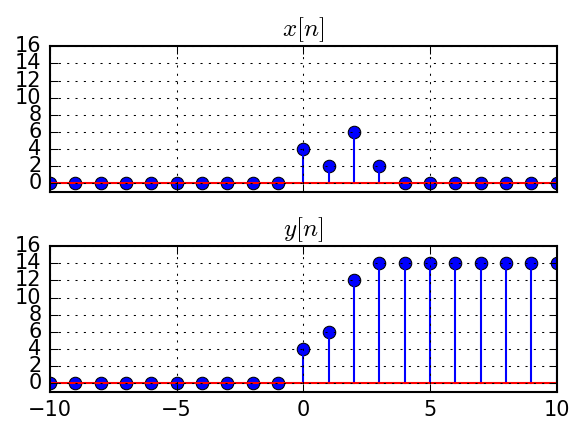

In [5]:
from scipy import signal
y = signal.lfilter(b=[1], a=[1, -1], x=x)

fig, ax = plt.subplots(2, sharex=True, sharey=True, figsize=(4,3), dpi=150)

ax[0].stem(n, x)
ax[0].set_title('$x[n]$')

ax[1].stem(n, y)
ax[1].set_title('$y[n]$')


plt.ylim(-1, 16)
plt.tight_layout()

# 4. Комплексная частотная характеристика LTI системы

$x[n] = e^{jwn}$

$y[n] = h[n]*x[n] = \sum\limits_{k=-\infty}^\infty h[k]\cdot x[n-k]$

$y[n] = h[n]*(e^{jwn}) = \sum\limits_{k=-\infty}^\infty h[k]\cdot e^{jw(n-k)} = \Big(\sum\limits_{k=-\infty}^\infty h[k]\cdot e^{-jwk} \Big) e^{jwn}$

$ H(e^{jw}) = \sum\limits_{k=-\infty}^\infty h[k]\cdot e^{-jwk}$ - комплексная частотная характеристика

$y[n] = H(e^{jw})\cdot e^{jwn}$

## АЧХ и ФЧХ

$ A(e^{jw}) = |H(e^{jw})| $ - амплитудо-частотная характеристика (АЧХ)

$ \phi(e^{jw}) = \angle H(e^{jw}) $ - фазо-частотная характеристика (ФЧХ)

## АЧХ скользящего среднего

$y[n] = S(x[n]) = \frac{1}{2M + 1}\sum\limits_{m=-M}^{M}x[n-m]$

$h[n] = S(\delta[n]) = \frac{1}{2M + 1}\sum\limits_{m=-M}^{M}\delta[n-m]$

$H(e^{jw}) = \sum\limits_{k=-\infty}^\infty h[k]\cdot e^{-jwk} = \sum\limits_{k=-\infty}^\infty \frac{1}{2M + 1} \sum\limits_{m=-M}^{M}\delta[k-m]\cdot e^{-jwk} $

$= \frac{1}{2M + 1} \sum\limits_{m=-M}^{M} \sum\limits_{k=-\infty}^\infty\delta[k-m]\cdot e^{-jwk} = \frac{1}{2M + 1} \sum\limits_{m=-M}^{M}e^{-jwm}$

$H(e^{jw}) = \frac{1}{2M + 1} \sum\limits_{m=-M}^{M}e^{-jwm} = \frac{1}{2M + 1} \sum\limits_{m=0}^{2M+1}e^{-jw (m -M)}$

$H(e^{jw}) = \frac{1}{2M + 1} \frac{sin\big(w(2M+1)/2\big)}{sin(w/2)}$

$ M = 1$

$H(e^{jw}) = \frac{1}{3} \frac{sin\big(w3/2\big)}{sin(w/2)}$

$A(e^{jw}) = |H(e^{jw})| = \Big|\frac{1}{3} \frac{sin(3w/2)}{sin(w/2)}\Big|$

(-3.141592653589793, 3.141592653589793)

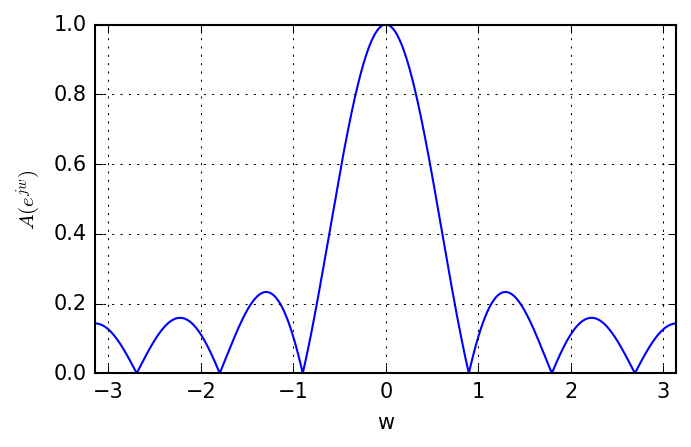

In [13]:
M=3
w = np.linspace(-np.pi*3, np.pi*3, 10000)
H = np.abs(np.sin(w*(2*M+1)/2)/np.sin(w/2)/(2*M+1))

plt.figure(dpi=150, figsize=(5,3))
plt.plot(w, H)
plt.ylabel('$A(e^{jw})$')
plt.xlabel('w')
plt.xlim(-np.pi, np.pi)

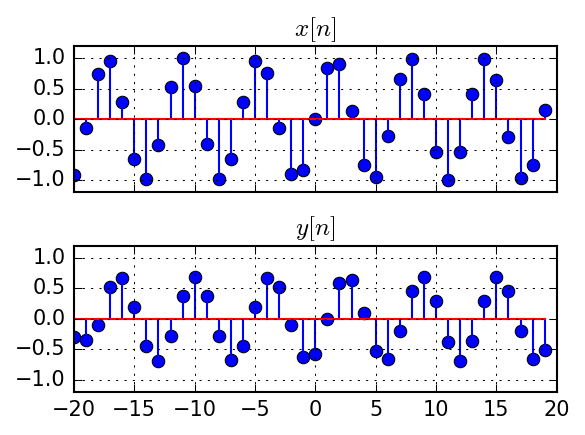

In [14]:
n = np.arange(-20, 20)

h = 1/3. * ((n==-1).astype(int) + (n==0).astype(int) + (n==1).astype(int))

#w = np.pi*2/3
w = 1
x = np.sin(w*n)
y = np.convolve(x, h, 'same')


fig, ax = plt.subplots(2, sharex=True, sharey=True, figsize=(4,3), dpi=150)

ax[0].stem(n, x)
ax[0].set_title('$x[n]$')

ax[1].stem(n, y)
ax[1].set_title('$y[n]$')


plt.ylim(-1.2, 1.2)
plt.tight_layout()